# Problem 

This is an image classification problem. Images are provided for two types of animals - `mucca` and `pecora`. The objective is to build a deep learning model to differentiate between these two animals.  

# Importing Libraries

In [1]:
# for loading the dataset
import numpy as np
import pandas as pd

# for accessing pixel data and plotting the images
import cv2
import matplotlib.pyplot as plt

# setting up a random seed
import random
random.seed(42)

In [2]:
# for splitting the training data 
from sklearn.model_selection import train_test_split

# for building deep learning models
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

# Loading the Data

The required datasets are present in a GitHub repository. Also, there is a separate csv file mapping the image file names with their labels, and actual images are in a zipped folder.

In [3]:
# cloning the Datasets repository
!git clone https://github.com/dphi-official/Datasets.git

Cloning into 'Datasets'...
remote: Enumerating objects: 9874, done.
remote: Total 9874 (delta 0), reused 0 (delta 0), pack-reused 9874
Receiving objects: 100% (9874/9874), 427.70 MiB | 36.48 MiB/s, done.
Resolving deltas: 100% (102/102), done.
Checking out files: 100% (9345/9345), done.


In [4]:
# copying the contents of the animal data folder to Google Drive
!cp -r Datasets/animal_data /content/animal_data/

# unzipping the contents of training folder
!unzip animal_data/train_beg.zip

Archive:  animal_data/train_beg.zip
   creating: train_beg/
  inflating: train_beg/Image_1.jpg   
  inflating: train_beg/Image_10.jpg  
  inflating: train_beg/Image_100.jpg  
  inflating: train_beg/Image_1000.jpg  
  inflating: train_beg/Image_1001.jpg  
  inflating: train_beg/Image_1002.jpg  
  inflating: train_beg/Image_1003.jpg  
  inflating: train_beg/Image_1004.jpg  
  inflating: train_beg/Image_1005.jpg  
  inflating: train_beg/Image_1006.jpg  
  inflating: train_beg/Image_1007.jpg  
  inflating: train_beg/Image_1008.jpg  
  inflating: train_beg/Image_1009.jpg  
  inflating: train_beg/Image_101.jpg  
  inflating: train_beg/Image_1010.jpg  
  inflating: train_beg/Image_1011.jpg  
  inflating: train_beg/Image_1012.jpg  
  inflating: train_beg/Image_1013.jpg  
  inflating: train_beg/Image_1014.jpg  
  inflating: train_beg/Image_1015.jpg  
  inflating: train_beg/Image_1016.jpg  
  inflating: train_beg/Image_1017.jpg  
  inflating: train_beg/Image_1018.jpg  
  inflating: train_beg/Ima

In [5]:
# loading the csv file
Training_set_animals = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/animal_data/Training_set_animals.csv')
Training_set_animals.head()

,filename,animal_type
0,Image_1.jpg,mucca
1,Image_2.jpg,mucca
2,Image_3.jpg,mucca
3,Image_4.jpg,mucca
4,Image_5.jpg,mucca


In [6]:
# checking no. of classes
Training_set_animals['animal_type'].unique()

array(['mucca', 'pecora'], dtype=object)

In [7]:
# getting the path of all training image files
filepaths = ['/content/train_beg/' + fname[:-4] + '.jpg' for fname in Training_set_animals['filename']]
filepaths 

['/content/train_beg/Image_1.jpg',
 '/content/train_beg/Image_2.jpg',
 '/content/train_beg/Image_3.jpg',
 '/content/train_beg/Image_4.jpg',
 '/content/train_beg/Image_5.jpg',
 '/content/train_beg/Image_6.jpg',
 '/content/train_beg/Image_7.jpg',
 '/content/train_beg/Image_8.jpg',
 '/content/train_beg/Image_9.jpg',
 '/content/train_beg/Image_10.jpg',
 '/content/train_beg/Image_11.jpg',
 '/content/train_beg/Image_12.jpg',
 '/content/train_beg/Image_13.jpg',
 '/content/train_beg/Image_14.jpg',
 '/content/train_beg/Image_15.jpg',
 '/content/train_beg/Image_16.jpg',
 '/content/train_beg/Image_17.jpg',
 '/content/train_beg/Image_18.jpg',
 '/content/train_beg/Image_19.jpg',
 '/content/train_beg/Image_20.jpg',
 '/content/train_beg/Image_21.jpg',
 '/content/train_beg/Image_22.jpg',
 '/content/train_beg/Image_23.jpg',
 '/content/train_beg/Image_24.jpg',
 '/content/train_beg/Image_25.jpg',
 '/content/train_beg/Image_26.jpg',
 '/content/train_beg/Image_27.jpg',
 '/content/train_beg/Image_28.jpg',
 

In [8]:
# to confirm whether number of training images is same as number of labels given
if len(Training_set_animals) == len(filepaths):
    print('Number of labels i.e.', len(Training_set_animals), 'matches the number of filenames i.e.', len(filepaths))
else:
    print('Number of labels does not matches the number of filenames')

Number of labels i.e. 1200 matches the number of filenames i.e. 1200


In [9]:
# adding the filepath of images in the csv file
Training_set_animals['filepath'] = filepaths

In [10]:
Training_set_animals

,filename,animal_type,filepath
0,Image_1.jpg,mucca,/content/train_beg/Image_1.jpg
1,Image_2.jpg,mucca,/content/train_beg/Image_2.jpg
2,Image_3.jpg,mucca,/content/train_beg/Image_3.jpg
3,Image_4.jpg,mucca,/content/train_beg/Image_4.jpg
4,Image_5.jpg,mucca,/content/train_beg/Image_5.jpg
...,...,...,...
1195,Image_1196.jpg,pecora,/content/train_beg/Image_1196.jpg
1196,Image_1197.jpg,pecora,/content/train_beg/Image_1197.jpg
1197,Image_1198.jpg,pecora,/content/train_beg/Image_1198.jpg
1198,Image_1199.jpg,pecora,/content/train_beg/Image_1199.jpg


In [11]:
# reading the pixel data of an image
img_array = cv2.imread(Training_set_animals['filepath'][30]) 
img_array.shape   

(200, 300, 3)

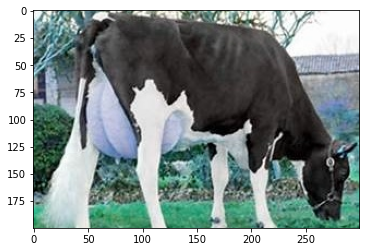

In [12]:
# plotting the image
plt.imshow(img_array)

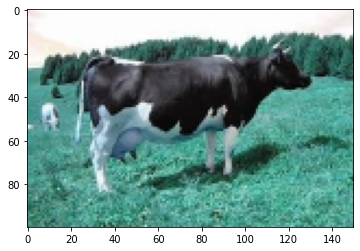

In [13]:
# plotting another image along with resizing
img_array = cv2.imread(Training_set_animals['filepath'][256]) 
new_array = cv2.resize(img_array, (150, 100))
plt.imshow(new_array)

# Accessing pixel data of all images 

Here, `training_data` is created as a list and appending the data and labels in it. Also, the obtained list needs to be shuffled because in the given dataset, images of `mucca` are only in the upper half and the lower half contains images of `pecora`.  

Label `0` corresponds to `mucca` and label `1` corresponds to `pecora`.

In [14]:
training_data = []

def create_training_data():
  for i in range(Training_set_animals.shape[0]):
    img_array = cv2.imread(Training_set_animals['filepath'][i])
    training_data.append([img_array, 0 if Training_set_animals['animal_type'][i] == 'mucca' else 1])
  random.shuffle(training_data)

create_training_data()

In [15]:
print(len(training_data))

1200


In [16]:
# splitting the features & labels, and converting them to numpy array

X = []
y = []

for features, label in training_data:
  X.append(features)
  y.append(label)

X = np.array(X)
y = np.array(y)

In [17]:
X.shape, y.shape

((1200, 200, 300, 3), (1200,))

In [18]:
# splitting into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print('X_train.shape :', X_train.shape, ', y_train.shape :',  y_train.shape)
print('X_train.shape :', X_test.shape, ', y_train.shape :',  y_test.shape)

X_train.shape : (960, 200, 300, 3) , y_train.shape : (960,)
X_train.shape : (240, 200, 300, 3) , y_train.shape : (240,)


# Defining Preprocessing Layers and Callback

The images need to be resized and rescaled so that the model is able to learn from it easily. Since the pixel values range from 0 to 255, rescaling is done by dividing the data by 255. Also, the original dimensions are `200, 300, 3` (3 denotes the no. of channels, i.e., RGB). Resizing is done such that the ratio of height & width is kept intact and the images aren't distorted. 

Neural networks perform well when lot of data is fed to it for training. If images are less, data augmentation comes into picture. It is the process of artificially enlarging a dataset through image transformations like rotating, cropping etc.  

Earlystopping Callback stops the training as specified it the argument.

In [ ]:
resize_and_rescale = tf.keras.Sequential([ 
  tf.keras.layers.experimental.preprocessing.Resizing(75, 50),
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
  tf.keras.layers.experimental.preprocessing.CenterCrop(75, 50), 
  tf.keras.layers.experimental.preprocessing.RandomContrast(0.2), 
  tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
])


earlystopping_callback = EarlyStopping(
    monitor = 'val_loss', min_delta = 0, patience = 3, verbose = 0, mode = 'auto',
    baseline = None, restore_best_weights = True
)

# Multi Layer Perceptron Models 

An MLP model refers to a simple neural network with multiple hidden layers.

### Model 1

In [ ]:
mlp_model1 = Sequential()

mlp_model1.add(resize_and_rescale)
mlp_model1.add(data_augmentation)
mlp_model1.add(Flatten())
mlp_model1.add(Dense(4096, activation = 'relu'))
mlp_model1.add(Dense(2048, activation = 'relu'))  
mlp_model1.add(Dense(1024, activation = 'relu')) 
mlp_model1.add(Dense(512, activation = 'relu')) 
mlp_model1.add(Dense(128, activation = 'relu')) 
mlp_model1.add(Dense(1, activation = 'sigmoid'))    



mlp_model1.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',               
              metrics = ['accuracy'])

history = mlp_model1.fit(X_train, y_train, 
                     validation_split = 0.1, 
                     epochs = 30, 
                     batch_size = 128, 
                     verbose = 1, 
                     callbacks = [earlystopping_callback])

Epoch 1/30
7/7 [==============================] - 5s 784ms/step - loss: 7.1607 - accuracy: 0.5093 - val_loss: 9.1106 - val_accuracy: 0.5000
Epoch 2/30
7/7 [==============================] - 5s 763ms/step - loss: 3.5022 - accuracy: 0.5023 - val_loss: 1.3329 - val_accuracy: 0.5000
Epoch 3/30
7/7 [==============================] - 5s 770ms/step - loss: 0.8979 - accuracy: 0.4954 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 4/30
7/7 [==============================] - 5s 750ms/step - loss: 0.7125 - accuracy: 0.5035 - val_loss: 0.8109 - val_accuracy: 0.5000
Epoch 5/30
7/7 [==============================] - 5s 750ms/step - loss: 0.7420 - accuracy: 0.4757 - val_loss: 0.7046 - val_accuracy: 0.5000
Epoch 6/30
7/7 [==============================] - 5s 752ms/step - loss: 0.6968 - accuracy: 0.5116 - val_loss: 0.7128 - val_accuracy: 0.5000


In [ ]:
mlp_model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 75, 50, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 75, 50, 3)         0         
_________________________________________________________________
flatten (Flatten)            (None, 11250)             0         
_________________________________________________________________
dense (Dense)                (None, 4096)              46084096  
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              8390656   
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_3 (Dense)              (None, 512)              

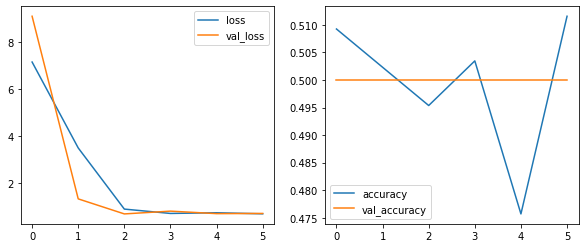

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (10, 4))

history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(kind = 'line', ax = ax[0])
history_df[['accuracy', 'val_accuracy']].plot(kind = 'line', ax = ax[1]);

In [ ]:
mlp_model1.evaluate(X_test, y_test)

8/8 [==============================] - 1s 83ms/step - loss: 0.6907 - accuracy: 0.5625


[0.6906932592391968, 0.5625]

### Model 2 - Introducing some more layers

In [ ]:
mlp_model2 = Sequential()

mlp_model2.add(resize_and_rescale)
mlp_model2.add(data_augmentation)
mlp_model2.add(Flatten())
mlp_model2.add(Dense(4096, activation = 'relu'))
mlp_model2.add(Dense(4096, activation = 'relu')) 
mlp_model2.add(Dense(2048, activation = 'relu')) 
mlp_model2.add(Dense(2048, activation = 'relu')) 
mlp_model2.add(Dense(1024, activation = 'relu')) 
mlp_model2.add(Dense(1024, activation = 'relu')) 
mlp_model2.add(Dense(512, activation = 'relu')) 
mlp_model2.add(Dense(128, activation = 'relu')) 
mlp_model2.add(Dense(64, activation = 'relu'))
mlp_model2.add(Dense(32, activation = 'relu'))  
mlp_model2.add(Dense(1, activation = 'sigmoid'))     



mlp_model2.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',               
              metrics = ['accuracy'])

history = mlp_model2.fit(X_train, y_train, 
                     validation_split = 0.1, 
                     epochs = 30, 
                     batch_size = 64, 
                     verbose = 1, 
                     callbacks = [earlystopping_callback])

Epoch 1/30
14/14 [==============================] - 11s 770ms/step - loss: 1.8534 - accuracy: 0.5023 - val_loss: 0.6946 - val_accuracy: 0.5000
Epoch 2/30
14/14 [==============================] - 11s 755ms/step - loss: 0.6962 - accuracy: 0.5023 - val_loss: 0.6946 - val_accuracy: 0.5000
Epoch 3/30
14/14 [==============================] - 10s 747ms/step - loss: 0.6947 - accuracy: 0.5069 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 4/30
14/14 [==============================] - 11s 757ms/step - loss: 0.6938 - accuracy: 0.4734 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 5/30
14/14 [==============================] - 10s 749ms/step - loss: 0.6935 - accuracy: 0.5162 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 6/30
14/14 [==============================] - 11s 751ms/step - loss: 0.6928 - accuracy: 0.5162 - val_loss: 0.6917 - val_accuracy: 0.5000
Epoch 7/30
14/14 [==============================] - 11s 752ms/step - loss: 0.6914 - accuracy: 0.5312 - val_loss: 0.6908 - val_accuracy: 0.5000

In [ ]:
mlp_model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 75, 50, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 75, 50, 3)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 11250)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 4096)              46084096  
_________________________________________________________________
dense_7 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dense_8 (Dense)              (None, 2048)              8390656   
_________________________________________________________________
dense_9 (Dense)              (None, 2048)             

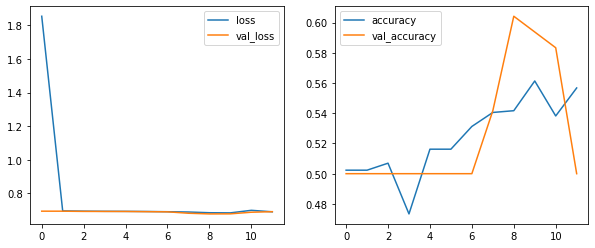

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (10, 4))

history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(kind = 'line', ax = ax[0])
history_df[['accuracy', 'val_accuracy']].plot(kind = 'line', ax = ax[1]);

In [ ]:
mlp_model2.evaluate(X_test, y_test)

8/8 [==============================] - 1s 111ms/step - loss: 0.6833 - accuracy: 0.5833


[0.6832969188690186, 0.5833333134651184]

# Convolutional Neural Network

Convolution neural networks perform better than MLP models for image recognition. Filters are used to transform inputs and extract features that allows the model to recognize certain images.The weights of a filter are defined through a kernel matrix.

A convolution layer applies multiple filters to the input tensor. Adding more filters to it allows the layer to better extract hidden features.

### Using three convolution layers

In [ ]:
cnn_model = Sequential()

cnn_model.add(resize_and_rescale)

cnn_model.add(data_augmentation)

cnn_model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (75, 50, 3), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(1024, activation='relu'))
cnn_model.add(Dropout(rate = 0.5))

cnn_model.add(Dense(1024, activation='relu'))
cnn_model.add(Dropout(rate = 0.5))

cnn_model.add(Dense(528, activation='relu'))
cnn_model.add(Dropout(rate = 0.5))

cnn_model.add(Dense(1, activation = 'sigmoid'))



cnn_model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',               
              metrics = ['accuracy'])

history = cnn_model.fit(X_train, y_train, 
                     validation_split = 0.2, 
                     epochs = 15, 
                     batch_size = 64, 
                     verbose = 1, 
                     callbacks = [earlystopping_callback]) 

Epoch 1/15
12/12 [==============================] - 5s 419ms/step - loss: 0.6994 - accuracy: 0.5117 - val_loss: 0.7013 - val_accuracy: 0.4479
Epoch 2/15
12/12 [==============================] - 5s 404ms/step - loss: 0.6912 - accuracy: 0.5339 - val_loss: 0.7404 - val_accuracy: 0.4479
Epoch 3/15
12/12 [==============================] - 5s 408ms/step - loss: 0.6829 - accuracy: 0.5612 - val_loss: 0.7130 - val_accuracy: 0.5156
Epoch 4/15
12/12 [==============================] - 6s 539ms/step - loss: 0.6652 - accuracy: 0.6250 - val_loss: 0.6275 - val_accuracy: 0.6562
Epoch 5/15
12/12 [==============================] - 5s 398ms/step - loss: 0.6864 - accuracy: 0.5625 - val_loss: 0.6409 - val_accuracy: 0.6458
Epoch 6/15
12/12 [==============================] - 5s 401ms/step - loss: 0.6771 - accuracy: 0.5846 - val_loss: 0.6832 - val_accuracy: 0.5469
Epoch 7/15
12/12 [==============================] - 5s 398ms/step - loss: 0.6405 - accuracy: 0.6380 - val_loss: 0.6364 - val_accuracy: 0.6458


In [ ]:
cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 75, 50, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 75, 50, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (64, 73, 48, 32)          896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (64, 36, 24, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (64, 34, 22, 64)          18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (64, 17, 11, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (64, 15, 9, 64)          

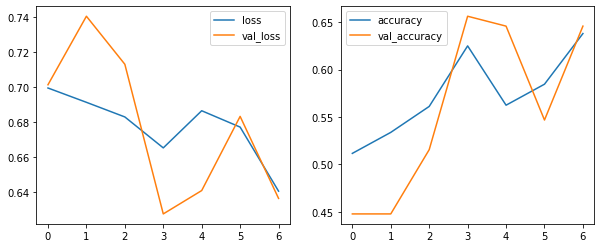

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (10, 4))

history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(kind = 'line', ax = ax[0])
history_df[['accuracy', 'val_accuracy']].plot(kind = 'line', ax = ax[1]);

In [ ]:
cnn_model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 46ms/step - loss: 0.6985 - accuracy: 0.5417


[0.6984853148460388, 0.5416666865348816]

# Transfer Learning - Using VGG 19

In transfer learning, a pre-trained model (VGG 19 in this case) is used to make predictions. Some of its layers are frozen so that previous trained weights are not altered, and some Dense layers are added at the bottom so that it can learn from current data. 

Here I am extracting features and labels again and resizing & rescaling it without using the preprocessing layer.

In [19]:
v_training_data = []

def create_v_training_data():
  for i in range(Training_set_animals.shape[0]):
    img_array = cv2.imread(Training_set_animals['filepath'][i])
    new_array = cv2.resize(img_array, (75, 50))
    v_training_data.append([new_array, 0 if Training_set_animals['animal_type'][i] == 'mucca' else 1])
  random.shuffle(v_training_data)

create_v_training_data()

In [20]:
# splitting features and labels

X_new = []
y_new = []

for features, label in v_training_data:
  X_new.append(features)
  y_new.append(label)

X_new = np.array(X_new)
y_new = np.array(y_new)

In [21]:
X_new.shape, y_new.shape

((1200, 50, 75, 3), (1200,))

In [22]:
# splitting into train and test

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size = 0.2, random_state = 42)

print('X_train.shape :', X_train_new.shape, ', y_train.shape :',  y_train_new.shape)
print('X_train.shape :', X_test_new.shape, ', y_train.shape :',  y_test_new.shape)

X_train.shape : (960, 50, 75, 3) , y_train.shape : (960,)
X_train.shape : (240, 50, 75, 3) , y_train.shape : (240,)


In [23]:
X_train_new = X_train_new / 255. 
X_test_new = X_test_new / 255.

In [24]:
# getting the VGG19 model
vgg_layers = tf.keras.applications.vgg19.VGG19(weights = 'imagenet', include_top = False, 
                                               input_shape = X_train_new.shape[1:])

vgg_layers.summary()

80142336/80134624 [==============================] - 0s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50, 75, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 50, 75, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 50, 75, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 25, 37, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 25, 37, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 25, 37, 128)       147584    
______________________________________________________________

In [25]:
# fine-tuning all the layers
for layer in vgg_layers.layers:
    layer.trainable = True

# checking the trainable status of the individual layers
for layer in vgg_layers.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f7c9b1b0ef0> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7c99546a90> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7c99533f60> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f7c9954c550> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7c9953bdd8> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7ce735e3c8> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f7c994e1978> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7c98c42128> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7c98c42f60> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7c98c48400> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7c98c48c50> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f7c92f0a

In [26]:
model = tf.keras.models.Sequential()

# adding the vgg convolutional base model
model.add(vgg_layers)

# flatten layer
model.add(Flatten())

# dense layers with some dropout
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(rate = 0.3))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(rate = 0.3))


# output layer
model.add(Dense(1, activation='sigmoid'))



model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 2e-5), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 1, 2, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               262400    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2

In [27]:
es_callback = EarlyStopping(monitor = 'val_loss', patience = 3, restore_best_weights = True, verbose = 1)

history = model.fit(X_train_new, y_train_new, 
                    validation_split = 0.1, 
                    epochs = 100, 
                    batch_size = 32, 
                    verbose = 1, 
                    callbacks = [es_callback]) 

Epoch 1/100
27/27 [==============================] - 156s 6s/step - loss: 0.6692 - accuracy: 0.5868 - val_loss: 0.5471 - val_accuracy: 0.8021
Epoch 2/100
27/27 [==============================] - 156s 6s/step - loss: 0.4746 - accuracy: 0.7720 - val_loss: 0.4592 - val_accuracy: 0.7917
Epoch 3/100
27/27 [==============================] - 159s 6s/step - loss: 0.3317 - accuracy: 0.8565 - val_loss: 0.4279 - val_accuracy: 0.7708
Epoch 4/100
27/27 [==============================] - 156s 6s/step - loss: 0.3444 - accuracy: 0.8576 - val_loss: 0.4055 - val_accuracy: 0.8125
Epoch 5/100
27/27 [==============================] - 155s 6s/step - loss: 0.1792 - accuracy: 0.9340 - val_loss: 0.4776 - val_accuracy: 0.8646
Epoch 6/100
27/27 [==============================] - 154s 6s/step - loss: 0.0865 - accuracy: 0.9722 - val_loss: 0.6516 - val_accuracy: 0.8021
Epoch 7/100
27/27 [==============================] - 158s 6s/step - loss: 0.0652 - accuracy: 0.9838 - val_loss: 0.8107 - val_accuracy: 0.7812
Epoch 

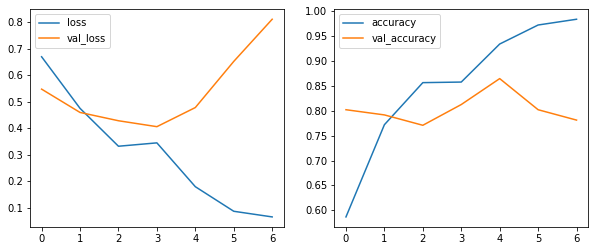

In [28]:
fig, ax = plt.subplots(1, 2, figsize = (10, 4))

history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(kind = 'line', ax = ax[0])
history_df[['accuracy', 'val_accuracy']].plot(kind = 'line', ax = ax[1]);

In [29]:
model.evaluate(X_test_new, y_test_new)

8/8 [==============================] - 9s 1s/step - loss: 0.3345 - accuracy: 0.8417


[0.3344859778881073, 0.8416666388511658]

# Making Predictions On Test Data For Submission

Since the transfer learning model performed the best, I will be using that one to make predictions.

In [30]:
# unzipping the contents
!unzip animal_data/test_beg.zip

Archive:  animal_data/test_beg.zip
   creating: test_beg/
  inflating: test_beg/Image_1.jpg    
  inflating: test_beg/Image_10.jpg   
  inflating: test_beg/Image_100.jpg  
  inflating: test_beg/Image_101.jpg  
  inflating: test_beg/Image_102.jpg  
  inflating: test_beg/Image_103.jpg  
  inflating: test_beg/Image_104.jpg  
  inflating: test_beg/Image_105.jpg  
  inflating: test_beg/Image_106.jpg  
  inflating: test_beg/Image_107.jpg  
  inflating: test_beg/Image_108.jpg  
  inflating: test_beg/Image_109.jpg  
  inflating: test_beg/Image_11.jpg   
  inflating: test_beg/Image_110.jpg  
  inflating: test_beg/Image_111.jpg  
  inflating: test_beg/Image_112.jpg  
  inflating: test_beg/Image_113.jpg  
  inflating: test_beg/Image_114.jpg  
  inflating: test_beg/Image_115.jpg  
  inflating: test_beg/Image_116.jpg  
  inflating: test_beg/Image_117.jpg  
  inflating: test_beg/Image_118.jpg  
  inflating: test_beg/Image_119.jpg  
  inflating: test_beg/Image_12.jpg   
  inflating: test_beg/Image_12

In [31]:
# loading the test data csv
Testing_set_animals = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/animal_data/Testing_set_animals.csv", header = None)
Testing_set_animals.columns = ['file']
Testing_set_animals.head()

,file
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg


In [32]:
# getting the path of all test image files
test_filepaths = ['/content/test_beg/' + fname[:-4] + '.jpg' for fname in Testing_set_animals['file']]

In [33]:
# confirm if number of test images is same as number of labels given
if len(Testing_set_animals) == len(test_filepaths):
    print('Number of labels i.e. ', len(Testing_set_animals), 'matches the number of filenames i.e. ', len(test_filepaths))
else:
    print('Number of labels doesnot matches the number of filenames')

Number of labels i.e.  400 matches the number of filenames i.e.  400


In [34]:
# adding the path of image files in the csv
Testing_set_animals['filepath'] = test_filepaths
Testing_set_animals.head()

,file,filepath
0,Image_1.jpg,/content/test_beg/Image_1.jpg
1,Image_2.jpg,/content/test_beg/Image_2.jpg
2,Image_3.jpg,/content/test_beg/Image_3.jpg
3,Image_4.jpg,/content/test_beg/Image_4.jpg
4,Image_5.jpg,/content/test_beg/Image_5.jpg


In [35]:
# reading the pixel data for test images

testing_data = []

def create_testing_data():
  for i in range(Testing_set_animals.shape[0]):
    img_array = cv2.imread(Testing_set_animals['filepath'][i])
    new_array = cv2.resize(img_array, (75, 50))     # resizing
    testing_data.append(new_array)

create_testing_data()

X_unseen = np.array(testing_data)
print(X_unseen.shape)

(400, 50, 75, 3)


In [36]:
# rescaling
X_unseen = X_unseen / 255.

In [37]:
# generating the predictions list in the required format
predictions = np.round(model.predict(X_unseen)).flatten().astype(int)
answers = ['mucca' if p == 0 else 'pecora' for p in predictions]
print(answers)

['pecora', 'pecora', 'mucca', 'pecora', 'pecora', 'mucca', 'mucca', 'pecora', 'mucca', 'pecora', 'mucca', 'mucca', 'pecora', 'mucca', 'pecora', 'mucca', 'mucca', 'mucca', 'pecora', 'pecora', 'pecora', 'mucca', 'mucca', 'pecora', 'pecora', 'pecora', 'mucca', 'pecora', 'mucca', 'pecora', 'mucca', 'pecora', 'mucca', 'mucca', 'pecora', 'mucca', 'mucca', 'mucca', 'pecora', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'pecora', 'pecora', 'mucca', 'mucca', 'pecora', 'pecora', 'mucca', 'mucca', 'pecora', 'mucca', 'mucca', 'pecora', 'pecora', 'pecora', 'mucca', 'pecora', 'pecora', 'pecora', 'mucca', 'mucca', 'pecora', 'mucca', 'mucca', 'pecora', 'pecora', 'mucca', 'mucca', 'mucca', 'mucca', 'pecora', 'pecora', 'pecora', 'pecora', 'pecora', 'pecora', 'pecora', 'mucca', 'pecora', 'pecora', 'mucca', 'mucca', 'mucca', 'pecora', 'mucca', 'pecora', 'mucca', 'pecora', 'mucca', 'pecora', 'mucca', 'mucca', 'mucca', 'pecora', 'pecora', 'mucca', 'mucca', 'pecora', 'pecora', 'pecora', 'pe